In [15]:
import librosa
import os
import IPython
import numpy as np

y, sr = librosa.load(os.path.join('.', 'data', 'label', 'u822565.mp3'), sr=44100)

# HPSS후 MFCC
- concat 방향 수정!!!!!!!!!!!!!!!!!!!

In [25]:
#HPSS
y_harmonic, y_percussive = librosa.effects.hpss(y, margin=1.5)

In [33]:
#mfcc
h_mfcc = librosa.feature.mfcc(y_harmonic, sr, n_mfcc=13) #13개 coefficient 사용
p_mfcc = librosa.feature.mfcc(y_percussive, sr, n_mfcc=13)

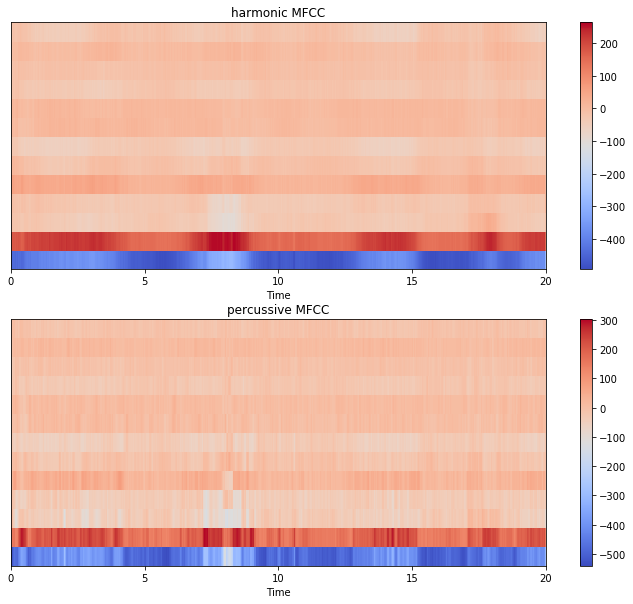

In [34]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(h_mfcc, x_axis='time')
plt.title('harmonic MFCC')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(p_mfcc, x_axis='time')
plt.title('percussive MFCC')
plt.colorbar()
plt.show()

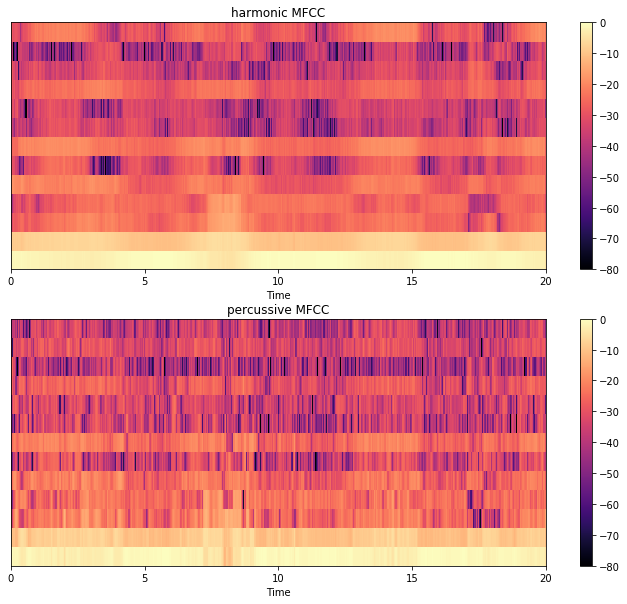

In [36]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(h_mfcc), ref=np.max), x_axis='time')
plt.title('harmonic MFCC')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(p_mfcc), ref=np.max), x_axis='time')
plt.title('percussive MFCC')
plt.colorbar()
plt.show()

In [56]:
import librosa
import numpy

#harmonic, percussive mfcc를 concat
#nfft: fft를 할 개수(sr/nfft=1 fft당 window size), hop_length: window stride
def get_mfcc(y, sr=44100, hop=512):
    y = librosa.util.normalize(y)
    y_harmonic, y_percussive = librosa.effects.hpss(y, margin=1.5)
    
    #13 coeffiecients
    h_mfcc = librosa.feature.mfcc(y_harmonic, sr, hop_length=hop, n_mfcc=13) 
    p_mfcc = librosa.feature.mfcc(y_percussive, sr, hop_length=hop, n_mfcc=13)
    
    out = np.concatenate((np.expand_dims(h_mfcc, axis=0), np.expand_dims(p_mfcc, axis=0)), axis=0)
    return out

In [57]:
ret = get_mfcc(os.path.join('.', 'data', 'label', 'u822565.mp3'))

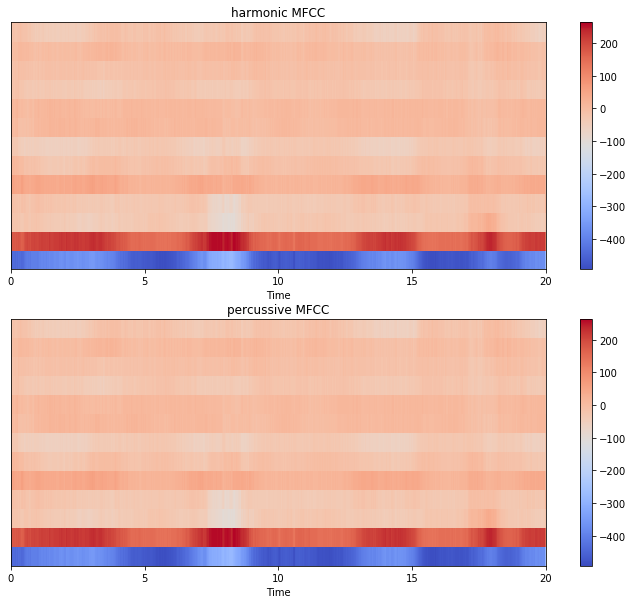

In [58]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(ret[0], x_axis='time')
plt.title('harmonic MFCC')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(ret[0], x_axis='time')
plt.title('percussive MFCC')
plt.colorbar()
plt.show()

In [69]:
ret.shape

(2, 13, 862)

# 주파수 조절

In [17]:
import librosa
import numpy as np

def freq_augmentation(file_path):
    y, sr = librosa.load(file_path, sr=44100)
    switch = np.random.randint(3)
    if(switch==0): #원본
        return [y,sr]
    elif(switch==1): #고음
        rate = np.random.uniform(2, 5)
    elif(switch==2): #저음
        rate = np.random.uniform(-5, -2)
    y = librosa.effects.pitch_shift(y, sr, n_steps=rate)
    return [y, sr]

In [22]:
ret = freq_augmentation(os.path.join('.', 'data', 'label', 'u822565.mp3'))

In [23]:
ret[0]

array([ 0.00384986,  0.00511041,  0.00475009, ..., -0.00680631,
       -0.0001653 ,  0.00448258], dtype=float32)

In [24]:
#원본
IPython.display.Audio(y, rate=sr)

In [25]:
#pitch aug
IPython.display.Audio(ret[0], rate=sr)